### 텍스트 데이터 수집 및 워드 클라우드 생성
#### 개별과제
- 네이버 브랜드 스토어의 상품 리뷰 데이터 수집
- 그 외의 관심있는 텍스트 데이터 수집
- 환경 : 개인 PC 주피터 노트북

#### 조별과제
- 워드 클라우드 만들기
- 수집한 텍스트 데이터에 대한 형태소 분석 : 자유롭게 EDA 수행
- 환경 : 구글 colab

## 개별과제 : 네이버 브랜드 스토어의 상품 리뷰 데이터 수집

In [2]:
from IPython.display import Image


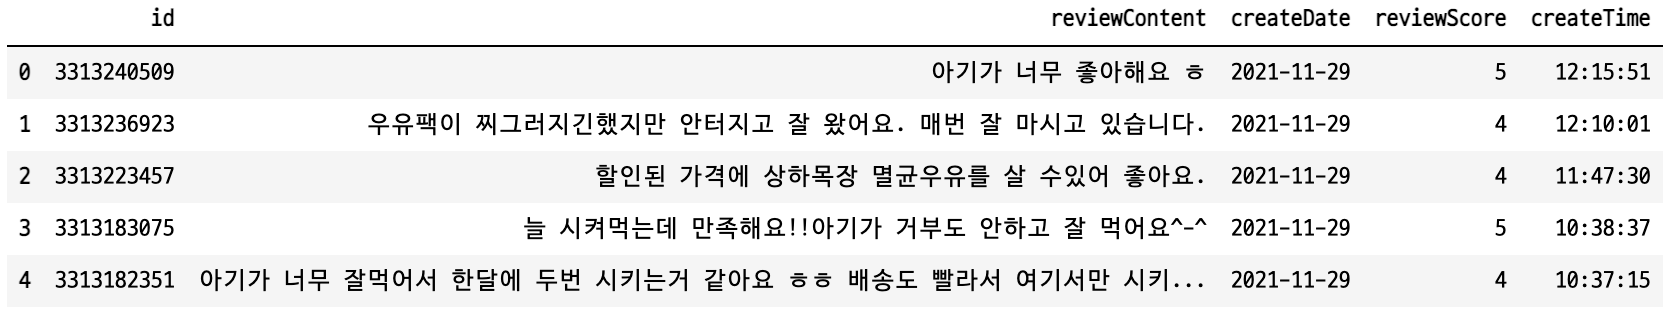

In [3]:
Image("imgs/wc_1.png")

## 네이버 상품데이터 수집

In [137]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.chrome.options import Options

In [164]:
driver = webdriver.Chrome()

In [165]:
#url = 'https://search.shopping.naver.com/catalog/28666318554?fromWhere=BRANDSTORE&NaPm=ct%3Dl00anvfk%7Cci%3D893d2c7f180be127cf4e51d89aa3f458bd87e99e%7Ctr%3Dbsc%7Csn%3D95694%7Chk%3D06966e078f7362b4eef3f95a61dd838a123f9f28'
url = 'https://search.shopping.naver.com/catalog/25604807522?fromWhere=BRANDSTORE&NaPm=ct%3Dl00a8rg8%7Cci%3Dd5e80971c9af4c31a1d51337e7abb8d64093bb0f%7Ctr%3Dbsc%7Csn%3D95694%7Chk%3D55b6182452775b5f73aa7dcd600734b36f68b16b'


In [166]:
driver.get(url)

In [167]:
time.sleep(10)
driver.find_element_by_css_selector("#section_review").text

<ipython-input-167-0803da2aa1b4>:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector("#section_review").text


'쇼핑몰리뷰\n사용자 총 평점사용자총평점이란?\n\n평점\n4.8/5\n전체 리뷰수\n5,169\n평점 비율\n88.08280131553492%\n4,553\n5점\n9.615012574966144%\n4점\n1.6637647514025924%\n3점\n0.30953762816792413%\n2점\n0.32888372992841947%\n1점\nAi리뷰\nbyHyperCLOVA\n도움말\nAI가 리뷰 데이터를 분석, 종합하여\n한줄로 간단하게 요약하는 서비스로,\n부정적인 내용 등은 분석 대상에서\n제외될 수 있습니다.\n색상\n�. 골드랑 바이올렛 조합이 사진으로 보던 것보다 더 이뻤습니\n디자인\n뒷면 재질이 눈으로 보기엔 플라스틱같지 않아서 무광으로 생각보다는 고급진 것 같아요\n사이즈\n크기도 적당하고성능은 사용하시기에 전혀 부족함 없이 좋습니다\n랭킹순\n선택됨\n\n최신순\n포토&동영상리뷰만 보기off\n전체 (5,169)\n5점 (4,553)\n4점 (497)\n3점 (86)\n2점 (16)\n1점 (17)\n주제전체\n만족도\n가격\n색상\n디자인\n사이즈\n품질\n사용성\n제품구성\n무게\n제품상태\n와이파이\n펼치기\n평점511번가sk******21.07.16.\n최고예요\n처음엔 S21이 발열 이슈가 있다고 들어서 구매를 망설이긴 했는데 막상 써보니까 제조연월이 최근이어서 그런지 또는 메모리를 크게 잡아먹는 태스크를 안 해서 그런지 발열이 전혀 없네요. 자급제 LTE를 써서 5g망 검색을 하지 않아서 발열이 안 나는 것 같기도 합니다. 제조연월은 염두에 두지 않고 있었는데 판매자께서 최근에 제조된 제품을 보내주셔서 만족하며 쓰고 있는 중입니다. 끼워주시는 젤리케이스도 품질이 괜찮아서 더 좋네요. 전에 쓰던 기종이 S8이라 점점 무거워져가던 차에 폰을 바꾸게 되었는데 품질 우려와는 달리 선녀입니다. 다만 아직 카메라 구동은 해보지 않아서 동영상 촬영시 발열이 심해지는지는 테스트 해보지 않았습니다.하드웨어 스펙이 오히려 전작보다 낮아지긴 했어도

In [169]:
#section_review > div.pagination_pagination__2M9a4 > a:nth-child(2)
#section_review > div.pagination_pagination__2M9a4 > a:nth-child(2)
#section_review > div.pagination_pagination__2M9a4 > a:nth-child(2)
#section_review > div.pagination_pagination__2M9a4 > a.pagination_next__3ycRH
delay = 20
cur_page = 2
wait = WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CSS_SELECTOR, "#section_review > div.pagination_pagination__2M9a4 > a:nth-child({})".format(cur_page)))).click()

In [162]:
driver.quit()

AttributeError: 'NoneType' object has no attribute 'quit'

In [110]:
selector = "#section_review > ul > li "
elements = driver.find_elements_by_css_selector(selector)
len(elements)

<ipython-input-110-613da0d0d124>:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  elements = driver.find_elements_by_css_selector(selector)


20

In [111]:
element = elements[0]

In [112]:
elements

[<selenium.webdriver.remote.webelement.WebElement (session="7d6a328b5a4decc95de374f6de4443bc", element="ec5a8e52-9098-44fa-8502-887fc7e65759")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7d6a328b5a4decc95de374f6de4443bc", element="c16ec19b-fd29-4daf-84d4-b62ffa8051e2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7d6a328b5a4decc95de374f6de4443bc", element="eafbf293-5cdb-45dc-a19e-8aaf0ffcdc1a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7d6a328b5a4decc95de374f6de4443bc", element="5c997028-6474-4912-a013-316b6a36f5dd")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7d6a328b5a4decc95de374f6de4443bc", element="732f8769-34f8-417a-ba54-d0b57bad7290")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7d6a328b5a4decc95de374f6de4443bc", element="80c6889e-54cb-463e-b15d-e8b601d19872")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7d6a328b5a4decc95de374f6de4443bc", element="c1fdec69-1f4e-42e0-bd00-6b

In [115]:
#section_review > ul > li:nth-child(1) > div.reviewItems_etc_area__2P8i3 > span.reviewItems_average__16Ya- > span
#section_review > ul > li:nth-child(1) > div.reviewItems_etc_area__2P8i3 > span:nth-child(2)
#section_review > ul > li:nth-child(1) > div.reviewItems_etc_area__2P8i3 > span:nth-child(3)
#section_review > ul > li:nth-child(1) > div.reviewItems_review__1eF8A > div > em
#section_review > ul > li:nth-child(1) > div.reviewItems_review__1eF8A > div > em

data = {
    "rating" : element.find_element_by_css_selector("span").text,
    "purchase" : element.find_element_by_css_selector("span:nth-child(2)").text,
    "user" : element.find_element_by_css_selector("span:nth-child(3)").text,
    "title" : element.find_element_by_css_selector(" div > em").text,
    "date" : element.find_element_by_css_selector("span:nth-child(4)").text,
    "content" : element.find_element_by_css_selector("div > p").text,
}
    
data

{'rating': '평점5',
 'purchase': '11번가',
 'user': 'sk******',
 'title': '최고예요',
 'date': '21.07.16.',
 'content': '처음엔 S21이 발열 이슈가 있다고 들어서 구매를 망설이긴 했는데 막상 써보니까 제조연월이 최근이어서 그런지 또는 메모리를 크게 잡아먹는 태스크를 안 해서 그런지 발열이 전혀 없네요. 자급제 LTE를 써서 5g망 검색을 하지 않아서 발열이 안 나는 것 같기도 합니다. 제조연월은 염두에 두지 않고 있었는데 판매자께서 최근에 제조된 제품을 보내주셔서 만족하며 쓰고 있는 중입니다. 끼워주시는 젤리케이스도 품질이 괜찮아서 더 좋네요. 전에 쓰던 기종이 S8이라 점점 무거워져가던 차에 폰을 바꾸게 되었는데 품질 우려와는 달리 선녀입니다. 다만 아직 카메라 구동은 해보지 않아서 동영상 촬영시 발열이 심해지는지는 테스트 해보지 않았습니다.하드웨어 스펙이 오히려 전작보다 낮아지긴 했어도 가성비 측면에서 보면 상당히 괜찮은 제품인 듯 하고 성능이 낮아졌더라도 고사양 게임 같은 것만 안 하면 발열 이슈는 크게 없을 것으로 보입니다. 기기덕후들 마냥 폰을 하이엔드 급으로 굴릴 거 아니면 무난히 좋은 제품인데 아무래도 전작에 비해 성능 너프는 마음 한 켠에 걸리는 측면이 좀 있긴 합니다. 다만 구형기종으로 오래 버텨왔고 .'}

In [116]:
%%time
datas = []
for element in elements:
    datas.append({
        "rating" : element.find_element_by_css_selector("span").text,
        "purchase" : element.find_element_by_css_selector("span:nth-child(2)").text,
        "user" : element.find_element_by_css_selector("span:nth-child(3)").text,
        "title" : element.find_element_by_css_selector("div > em").text,
        "date" : element.find_element_by_css_selector("span:nth-child(4)").text,
        "content" : element.find_element_by_css_selector("div > p").text,
    })
    
datas

df = pd.DataFrame(datas)
df.head()

Wall time: 3.64 s


,rating,purchase,user,title,date,content
0,평점5,11번가,sk******,최고예요,21.07.16.,처음엔 S21이 발열 이슈가 있다고 들어서 구매를 망설이긴 했는데 막상 써보니까 제...
1,평점5,KT공식몰,zx32****,"아이폰 7+를 쓰다 배터리가 빨리 닳기 시작한 점, 발열, 충전기 문제 등으로 핸드...",21.08.22.,"아이폰 7+를 쓰다 배터리가 빨리 닳기 시작한 점, 발열, 충전기 문제 등으로 핸드..."
2,평점5,롯데ON,y*m*****,믿고 쓰는 회사 제품입니다. 티비,21.07.18.,믿고 쓰는 회사 제품입니다.\n티비 광고 보고 갖고 싶어서 구매 했어요.\n사은품 ...
3,평점5,SSG닷컴,ys******,갤럭시 노트8에서 넘어왔어요 사실 핸드폰에 큰 관심이,21.09.03.,갤럭시 노트8에서 넘어왔어요\n사실 핸드폰에 큰 관심이 없어서 약정은 끝났지만 기존...
4,평점4,11번가,si******,좋아요,21.05.27.,S8 쓰다가 요번에 바꿨는데 확실히 속도가 빠르긴 하네요.핸펀 한 번 쓰면 오래 쓰...


In [ ]:
cur_page = 1
target_page = 100

while cur_page <= target_page:
    

In [203]:
#section_review > div.pagination_pagination__2M9a4 > a:nth-child(2)

def store(url):
    driver = webdriver.Chrome()
    url = 'https://search.shopping.naver.com/catalog/25604807522?fromWhere=BRANDSTORE&NaPm=ct%3Dl00a8rg8%7Cci%3Dd5e80971c9af4c31a1d51337e7abb8d64093bb0f%7Ctr%3Dbsc%7Csn%3D95694%7Chk%3D55b6182452775b5f73aa7dcd600734b36f68b16b'
    driver.get(url)
    time.sleep(5)
    cur_page = 1
    target_page = 3
    delay = 2
    WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CSS_SELECTOR, "#section_review > div.pagination_pagination__2M9a4 > a:nth-child({})".format(cur_page)))).click()
    time.sleep(4)
    while cur_page <= target_page:
        wait = WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CSS_SELECTOR, "#section_review > div.pagination_pagination__2M9a4 > a:nth-child({})".format(cur_page)))).click()
        time.sleep(4)
        selector = "#section_review > ul > li"
        elements = driver.find_elements_by_css_selector(selector)
        datas = []
        for element in elements:
            datas.append({
                "rating" : element.find_element_by_css_selector("span").text,
                "purchase" : element.find_element_by_css_selector("span:nth-child(2)").text,
                "user" : element.find_element_by_css_selector("span:nth-child(3)").text,
                "title" : element.find_element_by_css_selector("div > em").text,
                "date" : element.find_element_by_css_selector("span:nth-child(4)").text,
                "content" : element.find_element_by_css_selector("div > p").text,
            })
        print(cur_page)
        cur_page +=1
    driver.quit()
    return pd.DataFrame(datas)

In [205]:
df = store(url)

<ipython-input-203-d45db70999dd>:17: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  elements = driver.find_elements_by_css_selector(selector)
C:\Users\User\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:484: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


1
2
3


In [ ]:
dfs = []
for page in range(1, 101):
    
    dfs.append(store(page))
    print(page, end=' ')

In [32]:
response = requests.get(url)
response

<Response [200]>

In [33]:
response.text

'<!DOCTYPE html><html lang="ko"><head><link rel="preconnect" href="https://static.nid.naver.com"/><link rel="preconnect" href="https://lcs.naver.com"/><link rel="preconnect" href="http://shopping.phinf.naver.net"/><link rel="preconnect" href="https://ssl.pstatic.net"/><link rel="preconnect" href="https://shopping-phinf.pstatic.net"/><link rel="preconnect" href="https://volts.shopping.naver.com"/><meta name="viewport" content="width=device-width"/><meta charSet="utf-8"/><title>삼성전자 갤럭시S21 5G 256GB [자급제] : 네이버 쇼핑</title><link rel="shortcut icon" href="https://ssl.pstatic.net/shoppingsearch/static/pc/pc-220218-180309/img/favicon.ico"/><meta property="og:title" content="삼성전자 갤럭시S21 5G 256GB [자급제] : 네이버 쇼핑"/><meta property="og:description" content="화면크기 : 6.2인치, 통신규격 : 5G, 내장메모리 : 256GB, 운영체제 : 안드로이드11, 램(RAM) : 8GB, 해상도 : 2400x1080, 외장메모리타입 : microSD슬롯없음, 블루투스버전 : 블루투스5.0, 촬영 : 슬로모션, 후면카메라화소 : 트리플후면(6,400만+1,200만+1,200만), 전면카메라화소 : 전면(1,000만), 화소밀도 : 421ppi, 화면비율 : 20:9, 화면종류 : 다이나믹AM-OLED

In [42]:
dom = BeautifulSoup(response.text, "html.parser")

In [51]:
type(dom)

bs4.BeautifulSoup

In [52]:
#section_review
#section_review > ul > li.reviewItems_expand__3Gk1h
#<li class="reviewItems_expand__3Gk1h"><div class="reviewItems_etc_area__2P8i3"><span class="reviewItems_average__16Ya-"><span class="reviewItems_star__2EEY8"><span class="reviewItems_star_red__1mZYz" style="width:100%">평점</span></span>5</span><span class="reviewItems_etc__1YqVF">11번가</span><span class="reviewItems_etc__1YqVF">sk******</span><span class="reviewItems_etc__1YqVF">21.07.16.</span></div><div class="reviewItems_review__1eF8A"><div class="reviewItems_review_text__2Bwpa"><em class="reviewItems_title__39Z8H">최고예요</em><p class="reviewItems_text__XIsTc">처음엔 S21이 발열 이슈가 있다고 들어서 구매를 망설이긴 했는데 막상 써보니까 제조연월이 최근이어서 그런지 또는 메모리를 크게 잡아먹는 태스크를 안 해서 그런지 발열이 전혀 없네요. 자급제 LTE를 써서 5g망 검색을 하지 않아서 발열이 안 나는 것 같기도 합니다. 제조연월은 염두에 두지 않고 있었는데 판매자께서 최근에 제조된 제품을 보내주셔서 만족하며 쓰고 있는 중입니다. 끼워주시는 <em>젤리케이스도 품질이 괜찮아서 더 좋네요</em>. 전에 쓰던 기종이 S8이라 점점 무거워져가던 차에 폰을 바꾸게 되었는데 품질 우려와는 달리 선녀입니다. 다만 아직 카메라 구동은 해보지 않아서 동영상 촬영시 발열이 심해지는지는 테스트 해보지 않았습니다.하드웨어 스펙이 오히려 전작보다 낮아지긴 했어도 가성비 측면에서 보면 상당히 괜찮은 제품인 듯 하고 성능이 낮아졌더라도 고사양 게임 같은 것만 안 하면 발열 이슈는 크게 없을 것으로 보입니다. 기기덕후들 마냥 폰을 하이엔드 급으로 굴릴 거 아니면 무난히 좋은 제품인데 아무래도 전작에 비해 성능 너프는 마음 한 켠에 걸리는 측면이 좀 있긴 합니다. 다만 구형기종으로 오래 버텨왔고 <em>게임도 너무 무거운 거 안 하시는 분들은 S21로 넘어가시면 충분히 만족하실 듯 합니다</em>.</p></div></div><div class="reviewItems_btn_area__2St26"><a href="#" role="button" class="reviewItems_btn_expand__3tN9_" data-nclick="N=a:rev.unfold">리뷰접기</a></div></li>

In [53]:
elements = dom.select("#section_review > ul.reviewItems_list_review__1sgcJ > li")

In [54]:
len(elements)

0

## 조별과제 : 워드 클라우드 만들기 & EDA

<img src="imgs/wc_2.png" width="400px;" stype="float:left;" >

상하 우유는 아이가 주로 소비하고 유기농 멸균 우유라는 것이 이유인 것 같다.
주로 네이버 스마트 스토어는 배송으로 주문하기 위해 주문한다. -> 이런 식으로 워드 클라우드 정리